# Proposition 3.5


### Quaternionic Circulant and Quaternionic Fourier Matrices.

In [1]:
import numpy as np 
from quaternion_circulant_matrix import quaternionic_circulant_filter
from quaternion_matrix import quatmatmul_matrix_by_vector
from quaternion_circulant_matrix import create_qft_matrix
from quaternion_symplectic import qfft, qfft_eigenvalues, vis
np.set_printoptions(precision=2, suppress=True)  # for compact output

The first part of this proposition states:

For any $C \in H^{N \times N}$ that is circulant, and any pure unit $\mu \in H$,

* Any column $k=1..N$ of the inverse QFT matrix $Q^{-\mu}_N$ is an eigenvector of $C$.
Column $k$ corresponds to the $k^{th}$ component of the vector of \emph{left} eigenvalues $\lambda^\mu$ = $[\lambda_1^\mu \lambda_2^\mu \cdots \lambda_N^\mu]^{T} \in H^{N}$.
Vector $\lambda^\mu$ is equal to the (asymmetric) *right* QFT $F^{\mu}_{R*}$ of the kernel of $C$.

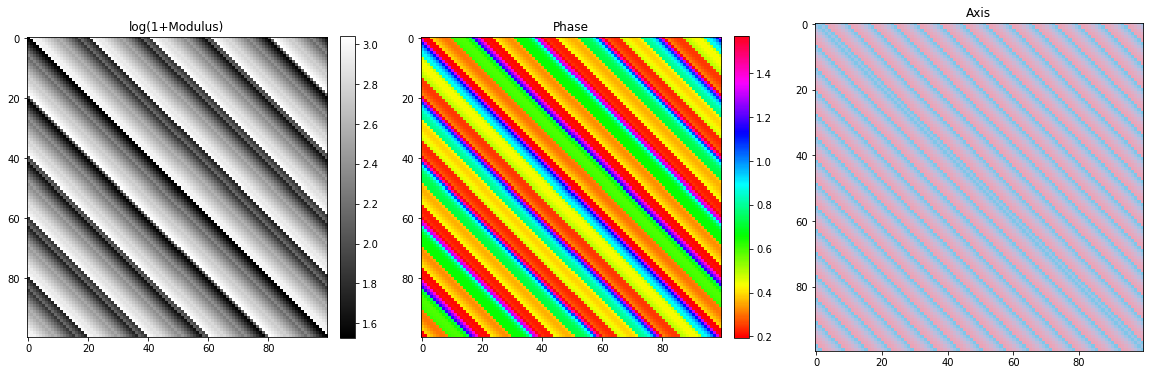

In [2]:
# As an example of the proof's validity, we will create a random quaternionic circulant matrix and check its properties:
N = 100
mykernel = np.zeros([N, ], dtype=np.quaternion)
for i in range(N):
    mykernel[i] = np.quaternion(i % 20, i%7, 2, 3)   #(i, (i**2)%10, 2*i+5, i*5*np.cos(i*np.pi)) random values as kernel
C = quaternionic_circulant_filter(mykernel)
vis(C)

In [3]:
###############################
# Create a QFT matrix (Q)
N = len(mykernel)
mu = np.quaternion(0, 1, 1, 1).normalized()
Q = create_qft_matrix(N, axis= -mu )
####################################################
# Check that the QFT gives us left eigenvalues....
lam = qfft_eigenvalues(mykernel, qft_axis=mu)
#lam_left_minusmu = np.sqrt(N) * qfft(mykernel, qft_axis=-mu, apply_shift=False) #experimenting
shouldbe_zerosum = 0
notalways_zerosum = 0
for i in range(N):
    column_i = Q[:, i]
    # Compare Cx against λx
    result_of_Cx = quatmatmul_matrix_by_vector(C, column_i)
    result_of_lx = lam[i] * column_i
    result_of_xl = column_i * lam[i]
    shouldbe_zerosum += np.sum(np.abs(result_of_Cx-result_of_lx))
    notalways_zerosum += np.sum(np.abs(result_of_Cx-result_of_xl))
print('Difference between Cx and λx is in total {} (in theory it must be zero. This means that the right qft gives left eigenvalues).'.format(shouldbe_zerosum))
print('Difference between Cx and xλ is in total {} (in theory this is not necessarily zero, aka left eigenvalues are not necessarily right eigenvalues also. They will coincide if the matrix is real.)'.format(notalways_zerosum))
#lam_asimage = np.reshape(lam, [N//20, 20])
#lam_left_minusmu_asimage = np.reshape(lam_left_minusmu, [N//20, 20])
#vis(lam_asimage, visualization_style='channelwise')
#vis(lam_left_minusmu_asimage, visualization_style='channelwise')

Difference between Cx and λx is in total 1.95828819924168e-09 (in theory it must be zero. This means that the right qft gives left eigenvalues).
Difference between Cx and xλ is in total 11182.330550916535 (in theory this is not necessarily zero, aka left eigenvalues are not necessarily right eigenvalues also. They will coincide if the matrix is real.)


The second part of the proposition, dual to the first part, states:

* Any column $k=1..N$ of the inverse QFT matrix $Q^{-\mu}_N$ is an eigenvector of $C^H$. 
Column $k$ corresponds to the $k^{th}$ component of the vector of *left* eigenvalues $\kappa^\mu$ = $[\kappa_1^\mu \kappa_2^\mu \cdots \kappa_N^\mu]^{T} \in H^{N}$.
The conjugate of the vector $\kappa^\mu$ is equal to the (asymmetric) *left* QFT $F^{\mu}_L$ of the kernel of $C$.

In [4]:
N = 300
mykernel = np.zeros([N, ], dtype=np.quaternion)
for i in range(N):
    mykernel[i] = np.quaternion(i, -i, 2*i+5, 5*np.cos(i*np.pi)) #random values as kernel
C = quaternionic_circulant_filter(mykernel)
N = len(mykernel)
mu = np.quaternion(0, 1, 1, 1).normalized()
Q = create_qft_matrix(N, axis= -mu )

CH = C.conj().T
#lam = np.sqrt(N) * qfft_right(mykernel, qft_axis=mu, apply_shift=False)
lam = np.sqrt(N) * qfft(mykernel, qft_axis=mu, apply_shift=False)
shouldbe_zerosum = 0
for i in range(N):
    column_i = Q[:, i]
    # Compare Cx against λx 
    tt_1 = quatmatmul_matrix_by_vector(CH, column_i)
    tt_2 = lam[i].conj() * column_i #ie, lam[i] is a *left* eigenvalue
    shouldbe_zerosum += np.sum(np.abs(tt_1-tt_2))

print('Difference between Cx and λx is in total {} (in theory it must be zero).'.format(shouldbe_zerosum))

Difference between Cx and λx is in total 1.5697699462102652e-06 (in theory it must be zero).
